# Convolutions and Dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

### Convlutions 
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

##### Guesses:

K1 - Copy / crop 1 pixel around the image (depends if we use padding)

K2 - Shift right one pixel

K3 - Not really sure :)

K4 - Blur (pure average kernel)

#### Apply to arrays
Apply the convolutions above to the following array, using numpy:


In [2]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [3]:
# Write your answer here
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ])/9.


In [4]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

In [5]:
kernels = [k1, k2, k3, k4]

print(f"Original X:\n{x}\n\n")

for k in kernels:
    print(f"Applied kernel:\n{k}")
    print(f"Result:\n{convolution2d(x, k)}\n")

Original X:
[[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]


Applied kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Result:
[[-2. -4.  0.]
 [-2.  2.  2.]
 [-3. -4. -4.]]

Applied kernel:
[[0 0 0]
 [0 0 1]
 [0 0 0]]
Result:
[[-4.  0. -2.]
 [ 2.  2.  3.]
 [-4. -4. -2.]]

Applied kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Result:
[[ -3. -25.   4.]
 [ -4.  33.  27.]
 [-13. -27. -36.]]

Applied kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Result:
[[-1.66666667 -1.22222222 -0.44444444]
 [-1.55555556 -1.66666667 -1.        ]
 [-1.55555556 -1.          0.        ]]



#### Apply to images
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image. 
Show the results:

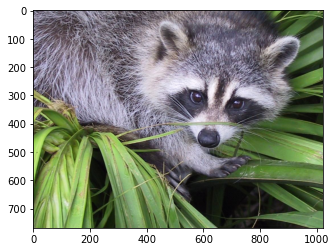

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face); plt.show()

In [7]:
# Transform to grayscale
face_gs = np.dot(face[...,:3], [0.2989, 0.5870, 0.1140])

Grayscaled image:


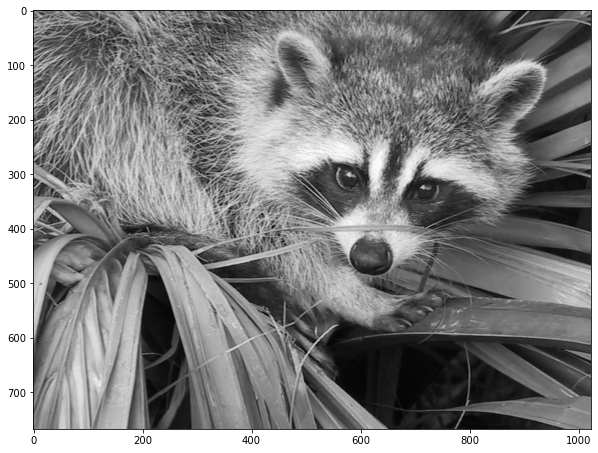

Applied kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Result:



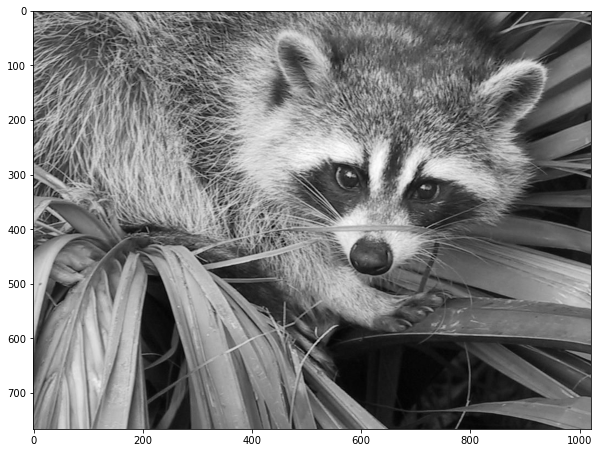

Applied kernel:
[[0 0 0]
 [0 0 1]
 [0 0 0]]
Result:



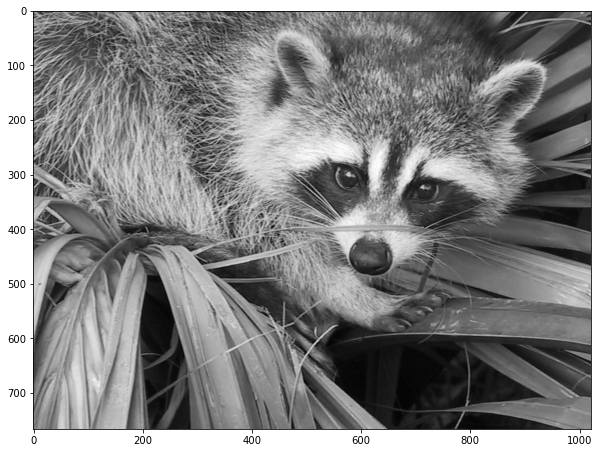

Applied kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Result:



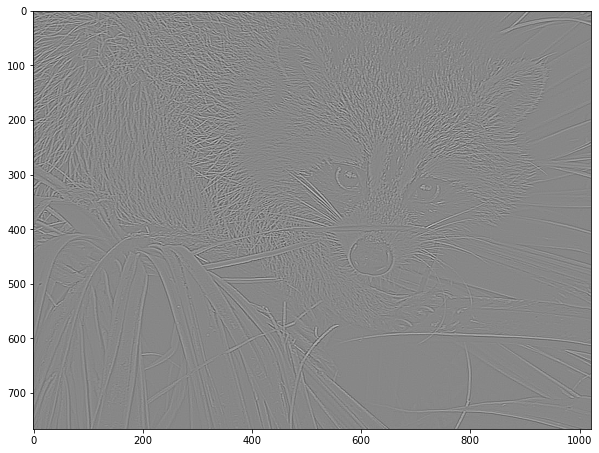

Applied kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Result:



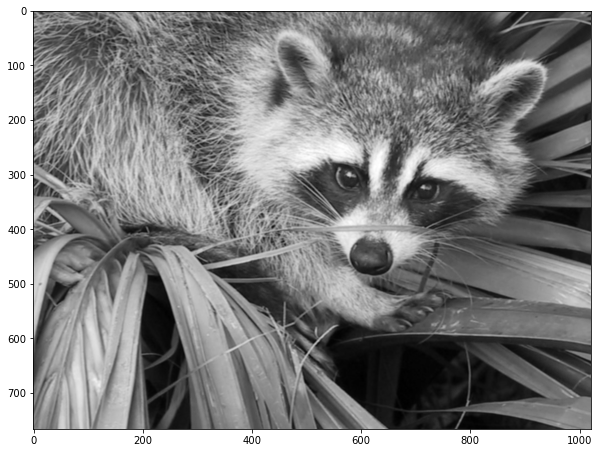

In [9]:
print(f"Grayscaled image:")
plt.figure(figsize=(10, 10))
plt.imshow(face_gs, cmap=plt.get_cmap('gray')); plt.show()

for k in kernels:
    print(f"Applied kernel:\n{k}\nResult:\n")
    plt.figure(figsize=(10, 10))
    plt.imshow(convolution2d(face_gs, k), cmap=plt.get_cmap('gray')); plt.show()


## Dimensions

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride. 

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

##### Write your answer here
$$
OutputDimension = \frac{(N - K + 2P)}{S} +1
$$

$N$ - Input image height / width

$K$ - Kernel height / width

$P$ - Padding size (padding pixels width)

$S$ - Strides size

So result output will be of size $OutputDimension \times OutputDimension$


##### Examples
For example a convolution of 5x5 on MNIST sample (28x28x1) without padding and stride of 1 calculation:
$$
OutputDimension = \frac{(28 - 5 + 2*0)}{1} +1 = 24
$$
So results of such convolution would be 24*24


For example a convolution of 5x5 on MNIST sample (28x28x1) with padding of 2 pixels on each edge of the image and stride of 1 calculation:
$$
OutputDimension = \frac{(28 - 5 + 2*2)}{1} + 1 = \frac{27}{1} + 1 = 28
$$
So results of such convolution would be 28*28 (original size since we padded by 2 pixels on each edge for 5x5 filter)


### Network dimensions
Write below the dimensions, the number of parameters and the number of calculations made in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).

Please write in this this format: (C,W,H) -> (#channels, width, height)


### Write your answer here

Firstly, I'd mention that as far as I saw, MNIST data is in grayscale (so there is only 1 channel per image) and there are 784 pixels per image (28 x 28).

#### Layer 1 - Conv #1 + Max Pooling #1
Input - (1, 28, 28)

Output after - 32 5x5 Convolution - (32, 24, 24)

Output after - 2x2 Max pooling, stride of 2 - (32, 12, 12)
#### Layer 1 - Parameters & calcs

Parameters count - $32*(5*5*1 + 1) = 832$

Calcs count - $5*5*32*24*24*2 + 2*2*32*12*12= 940,032$

Calcs explanation - 

5 * 5 * 32 * 24 * 24 - Since we use 5 * 5 filter multiplications to create each value in the output 32 * 24 * 24

After that we multiply by 2 (one time to calculate the value + one time for relu on value)

2 * 2 * 32 * 12 * 12 - Since we use 2 * 2 max pooling to create each value in the output 32 * 12 * 12

(I assume pytorch does optimizations but this is the naive number of calculations needed to be performed for a single sample forward pass)

#### Layer 2 - Conv #2 + Max Pooling #2
Input - (32, 12, 12)

Output after - 64 5x5 Convolution - (64, 8, 8)

Output after - 2x2 Max pooling, stride of 2 - (64, 4, 4)
#### Layer 2 - Parameters & calcs

Parameters count - $64*(5*5*32 + 1) = 51,264$

Calcs count - $5*5*64*8*8*2 + 2*2*64*4*4 = 208,896$

Calcs explanation - 

5 * 5 * 64 * 8 * 8 - Since we use 5 * 5 filter multiplications to create each value in the output 64 * 8 * 8

After that we multiply by 2 (one time to calculate the value + one time for relu on value)

2 * 2 * 64 * 4 * 4 - Since we use 2 * 2 max pooling to create each value in the output 64 * 4 * 4

(I assume pytorch does optimizations but this is the naive number of calculations needed to be performed for a single sample forward pass)


#### Layer 3 - Dense layer 1024 + dropout
Input - (64, 4, 4)

Output size - (-1, 1024)
#### Layer 3 - Parameters & calcs

Parameters count - $64*4*4*1024 + 1024 = 1,049,600$

Calcs count - $64*4*4*1024*3= 3,145,728?$

Calcs explanation - 

64 * 4 * 4 * 1024 - Number of connections we have to the dense layer, we multiply this number by 3 since we:
1. Multiply the raw value by weight
2. Sum the bias term
3. Perform relu on result

(I assume pytorch does optimizations but this is the naive number of calculations needed to be performed for a single sample forward pass)

#### Layer 4 - Dense layer 10 (Logits Layer)
Input - (-1, 1024)

Output size - (-1, 10)
#### Layer 4 - Parameters & calcs

Parameters count - $1024*10 + 10 = 10,250$

Calcs count - $1024*10*3= 30,720?$

Calcs explanation - 

1024 * 10 * 3 - Number of connections we have to the dense layer, we multiply this number by 3 since we:
1. Multiply the raw value by weight
2. Sum the bias term
3. Perform relu on result

(I assume pytorch does optimizations but this is the naive number of calculations needed to be performed for a single sample forward pass)


